In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from dython.nominal import identify_nominal_columns
from dython.nominal import associations
import time
from sklearn.metrics import accuracy_score
import pandas as pd
import tensorflow as tf


In [33]:
pd.set_option('display.max_columns', None)
# Import our input dataset
dogs = pd.read_csv('../Resources/Shelter_adoption_demograpics.csv')
dogs.head()

,index_id_intake,animal_id_intake,breed_category,breed_consolidated,breed_group,breed_contains_pitbull,color_consolidated,intake_type,intake_condition,sex_upon_intake_subtype,age_intake(days),age_intake(years),age_range_intake,intake_date,intake_month,intake_day1,intake_year,intake_numeric_weekday,intake_hour,outcome_date,outcome_month,outcome_day,outcome_year,outcome_weekday,age_outcome(days),age_upon_outcome(years),age_range_outcome,days_in_shelter,outcome,zipcode,population,population_density,land_area_in_sqmi,housing_units,median_household_income,Male_Population,Female_Population,Less_than_high_school,High_School_Graduate,Associates_degree,Bachelors_degree,Masters_degree,Professional_school_degree,Doctorate_degree,Race_white,Race_black_African_American,Race_American_Indian_Alaskan_native,Race_Asian,Race_Native_Hawaiian_Pacific_Islander,Race-Other,Race_Two_or_more
0,142136,A362707,Mix,retriever,sporting,N,Black,Owner Surrender,Sick,Female,4015,11.0,"(10.0, 12.5]",1/27/2016,1,27,2016,2,12,1/10/2017,1.0,10.0,2017.0,Tuesday,4667.0,12.79,"(12.5, 15.0]",348,Success,78725,6083,346,17.57,1978,52381,2988,3095,1890,2481,120,597,127,0,15,2924,1838,96,55,13,970,187
1,130786,A396810,Mix,retriever,sporting,N,Black,Stray,Injured,Female,4745,13.0,"(12.5, 15.0]",8/22/2016,8,22,2016,0,16,12/23/2016,12.0,23.0,2016.0,Friday,4912.0,13.46,"(12.5, 15.0]",122,Success,78724,21696,889,24.40,6138,38479,11181,10515,4341,5270,683,915,245,18,71,8339,6167,239,100,6,6165,680
2,123222,A428783,Purebred,herding,working-herding,N,Other,Public Assist,Normal,Female,2920,8.0,"(7.5, 10.0]",1/31/2014,1,31,2014,4,16,2/13/2014,2.0,13.0,2014.0,Thursday,3023.0,8.28,"(7.5, 10.0]",13,Success,78758,44072,4747,9.28,19577,43537,23014,21058,6267,12480,1690,6744,2167,169,200,25073,4810,467,2911,29,9196,1586
3,58675,A442798,Mix,terrier,terrier,N,White/Other,Public Assist,Normal,Female,3285,9.0,"(7.5, 10.0]",4/10/2015,4,10,2015,4,16,4/29/2015,4.0,29.0,2015.0,Wednesday,3485.0,9.55,"(7.5, 10.0]",18,Success,78752,18064,5403,3.34,7944,34716,9778,8286,3976,4429,493,2095,807,88,120,10787,2124,334,333,10,3781,695
4,76282,A443790,Mix,herding,working-herding,N,Black/Other,Stray,Normal,Male,3285,9.0,"(7.5, 10.0]",9/3/2014,9,3,2014,2,17,9/13/2014,9.0,13.0,2014.0,Saturday,3312.0,9.07,"(7.5, 10.0]",10,Success,78745,55614,4166,13.35,25749,50672,27813,27801,5393,18935,2426,10258,3204,587,359,40450,2596,601,1133,32,8730,2072


In [34]:
# Create new DF with animal_ids
#dogs.set_index("index_id_intake", inplace = True)

animal_id = pd.DataFrame().assign(animal_id_intake = dogs["animal_id_intake"])
dogs.head()

,index_id_intake,animal_id_intake,breed_category,breed_consolidated,breed_group,breed_contains_pitbull,color_consolidated,intake_type,intake_condition,sex_upon_intake_subtype,age_intake(days),age_intake(years),age_range_intake,intake_date,intake_month,intake_day1,intake_year,intake_numeric_weekday,intake_hour,outcome_date,outcome_month,outcome_day,outcome_year,outcome_weekday,age_outcome(days),age_upon_outcome(years),age_range_outcome,days_in_shelter,outcome,zipcode,population,population_density,land_area_in_sqmi,housing_units,median_household_income,Male_Population,Female_Population,Less_than_high_school,High_School_Graduate,Associates_degree,Bachelors_degree,Masters_degree,Professional_school_degree,Doctorate_degree,Race_white,Race_black_African_American,Race_American_Indian_Alaskan_native,Race_Asian,Race_Native_Hawaiian_Pacific_Islander,Race-Other,Race_Two_or_more
0,142136,A362707,Mix,retriever,sporting,N,Black,Owner Surrender,Sick,Female,4015,11.0,"(10.0, 12.5]",1/27/2016,1,27,2016,2,12,1/10/2017,1.0,10.0,2017.0,Tuesday,4667.0,12.79,"(12.5, 15.0]",348,Success,78725,6083,346,17.57,1978,52381,2988,3095,1890,2481,120,597,127,0,15,2924,1838,96,55,13,970,187
1,130786,A396810,Mix,retriever,sporting,N,Black,Stray,Injured,Female,4745,13.0,"(12.5, 15.0]",8/22/2016,8,22,2016,0,16,12/23/2016,12.0,23.0,2016.0,Friday,4912.0,13.46,"(12.5, 15.0]",122,Success,78724,21696,889,24.40,6138,38479,11181,10515,4341,5270,683,915,245,18,71,8339,6167,239,100,6,6165,680
2,123222,A428783,Purebred,herding,working-herding,N,Other,Public Assist,Normal,Female,2920,8.0,"(7.5, 10.0]",1/31/2014,1,31,2014,4,16,2/13/2014,2.0,13.0,2014.0,Thursday,3023.0,8.28,"(7.5, 10.0]",13,Success,78758,44072,4747,9.28,19577,43537,23014,21058,6267,12480,1690,6744,2167,169,200,25073,4810,467,2911,29,9196,1586
3,58675,A442798,Mix,terrier,terrier,N,White/Other,Public Assist,Normal,Female,3285,9.0,"(7.5, 10.0]",4/10/2015,4,10,2015,4,16,4/29/2015,4.0,29.0,2015.0,Wednesday,3485.0,9.55,"(7.5, 10.0]",18,Success,78752,18064,5403,3.34,7944,34716,9778,8286,3976,4429,493,2095,807,88,120,10787,2124,334,333,10,3781,695
4,76282,A443790,Mix,herding,working-herding,N,Black/Other,Stray,Normal,Male,3285,9.0,"(7.5, 10.0]",9/3/2014,9,3,2014,2,17,9/13/2014,9.0,13.0,2014.0,Saturday,3312.0,9.07,"(7.5, 10.0]",10,Success,78745,55614,4166,13.35,25749,50672,27813,27801,5393,18935,2426,10258,3204,587,359,40450,2596,601,1133,32,8730,2072


In [35]:
dogs.drop(["index_id_intake", "animal_id_intake","intake_date", "outcome_date", "outcome_month", "outcome_day", "outcome_year", "outcome_weekday",
          "age_outcome(days)", "age_upon_outcome(years)", "outcome_weekday", "age_outcome(days)", "age_upon_outcome(years)", "age_intake(years)",
           "age_range_intake", "intake_month", "intake_day1", "intake_year", "intake_numeric_weekday", "intake_hour", "land_area_in_sqmi",
           "age_range_outcome", "zipcode", "population", "population_density", "Male_Population", "Female_Population", "housing_units",
           "Less_than_high_school", "High_School_Graduate", "Associates_degree", "Bachelors_degree","Masters_degree", 
           "Professional_school_degree", "Doctorate_degree", "Race_white", "Race_black_African_American", "Race_American_Indian_Alaskan_native",
           "Race_Asian", "Race_Native_Hawaiian_Pacific_Islander", "Race-Other", "Race_Two_or_more", "median_household_income"], axis = 1, inplace = True)

In [ ]:
# from dython.nominal import identify_nominal_columns
# categorical_features=identify_nominal_columns(dogs)
# categorical_features


In [ ]:
# associations(dogs, nominal_columns='auto', numerical_columns=None, mark_columns=False,
#              nom_nom_assoc='cramer', num_num_assoc='pearson', cramers_v_bias_correction=True, nan_strategy='replace',
#              nan_replace_value=0.0, ax=None, figsize=None, annot=True, fmt='.2f',
#              cmap=None, sv_color='silver', cbar=True, vmax=1.0, vmin=None, plot=True, 
#              compute_only=False, clustering=False, title=None, filename=None)

In [ ]:
# complete_correlation= associations(dogs, filename= 'test_correlation.png', figsize=(10,10))

In [36]:
# Generate our categorical variable lists
dogs_cat = dogs.dtypes[dogs.dtypes == "object"].index.tolist()

# Check the number of unique values in each column
dogs[dogs_cat].nunique()

breed_category              2
breed_consolidated         12
breed_group                11
breed_contains_pitbull      2
color_consolidated         14
intake_type                 4
intake_condition           10
sex_upon_intake_subtype     3
outcome                     2
dtype: int64

In [37]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(dogs[dogs_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(dogs_cat)
encode_df.head(5)

,breed_category_Mix,breed_category_Purebred,breed_consolidated_Malinois/German Shepherd,breed_consolidated_chihuahua,breed_consolidated_guardian,breed_consolidated_herding,breed_consolidated_hound,breed_consolidated_nonsporting,breed_consolidated_pit bull,breed_consolidated_pointer,breed_consolidated_retriever,breed_consolidated_terrier,breed_consolidated_toy,breed_consolidated_working,breed_consolidated_nan,breed_group_Hound,breed_group_Nonsporting,breed_group_Pit bull terrier,breed_group_hound,breed_group_nonsporting,breed_group_pit bull,breed_group_sporting,breed_group_terrier,breed_group_toy,breed_group_working,breed_group_working-herding,breed_group_nan,breed_contains_pitbull_N,breed_contains_pitbull_Y,color_consolidated_Black,color_consolidated_Black/Other,color_consolidated_Black/White,color_consolidated_Brindle,color_consolidated_Brown,color_consolidated_Brown/Other,color_consolidated_Brown/White,color_consolidated_Other,color_consolidated_Red/Other,color_consolidated_Tan/Tan Mix,color_consolidated_Tan/White,color_consolidated_White,color_consolidated_White/Black or Brown,color_consolidated_White/Other,intake_type_Abandoned,intake_type_Owner Surrender,intake_type_Public Assist,intake_type_Stray,intake_condition_Aged,intake_condition_Behavior,intake_condition_Injured,intake_condition_Medical,intake_condition_Neonatal,intake_condition_Normal,intake_condition_Nursing,intake_condition_Other,intake_condition_Pregnant,intake_condition_Sick,sex_upon_intake_subtype_Female,sex_upon_intake_subtype_Male,sex_upon_intake_subtype_Unknown,outcome_Fail,outcome_Success
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [38]:
# Merge one-hot encoded features and drop the originals
dogs = dogs.merge(encode_df,left_index=True, right_index=True)
dogs = dogs.drop(dogs_cat,1)
dogs.head(5)

C:\Users\arroc\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,age_intake(days),days_in_shelter,breed_category_Mix,breed_category_Purebred,breed_consolidated_Malinois/German Shepherd,breed_consolidated_chihuahua,breed_consolidated_guardian,breed_consolidated_herding,breed_consolidated_hound,breed_consolidated_nonsporting,breed_consolidated_pit bull,breed_consolidated_pointer,breed_consolidated_retriever,breed_consolidated_terrier,breed_consolidated_toy,breed_consolidated_working,breed_consolidated_nan,breed_group_Hound,breed_group_Nonsporting,breed_group_Pit bull terrier,breed_group_hound,breed_group_nonsporting,breed_group_pit bull,breed_group_sporting,breed_group_terrier,breed_group_toy,breed_group_working,breed_group_working-herding,breed_group_nan,breed_contains_pitbull_N,breed_contains_pitbull_Y,color_consolidated_Black,color_consolidated_Black/Other,color_consolidated_Black/White,color_consolidated_Brindle,color_consolidated_Brown,color_consolidated_Brown/Other,color_consolidated_Brown/White,color_consolidated_Other,color_consolidated_Red/Other,color_consolidated_Tan/Tan Mix,color_consolidated_Tan/White,color_consolidated_White,color_consolidated_White/Black or Brown,color_consolidated_White/Other,intake_type_Abandoned,intake_type_Owner Surrender,intake_type_Public Assist,intake_type_Stray,intake_condition_Aged,intake_condition_Behavior,intake_condition_Injured,intake_condition_Medical,intake_condition_Neonatal,intake_condition_Normal,intake_condition_Nursing,intake_condition_Other,intake_condition_Pregnant,intake_condition_Sick,sex_upon_intake_subtype_Female,sex_upon_intake_subtype_Male,sex_upon_intake_subtype_Unknown,outcome_Fail,outcome_Success
0,4015,348,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,4745,122,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2920,13,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,3285,18,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,3285,10,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [39]:
# Split our preprocessed data into our features and target arrays. Split before using standard scaler so that testing
# data isn't influencing the standardization
y = dogs["outcome_Success"].values
X = dogs.drop(["outcome_Success","outcome_Fail"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

C:\Users\arroc\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


In [40]:
feature_names = dogs.drop(["outcome_Success","outcome_Fail"],1).columns

C:\Users\arroc\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [41]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


## Neural Network

In [ ]:
# from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
# import eli5
# from eli5.sklearn import PermutationImportance

In [42]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  15
hidden_nodes_layer2 = 15

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 15)                945       
                                                                 
 dense_4 (Dense)             (None, 15)                240       
                                                                 
 dense_5 (Dense)             (None, 1)                 16        
                                                                 
Total params: 1,201
Trainable params: 1,201
Non-trainable params: 0
_________________________________________________________________


In [43]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [44]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
191/191 [==============================] - 1s 1ms/step - loss: 0.6668 - accuracy: 0.6221
Epoch 2/100
191/191 [==============================] - 0s 1ms/step - loss: 0.6140 - accuracy: 0.6884
Epoch 3/100
191/191 [==============================] - 0s 1ms/step - loss: 0.6002 - accuracy: 0.6981
Epoch 4/100
191/191 [==============================] - 0s 1ms/step - loss: 0.5931 - accuracy: 0.7015
Epoch 5/100
191/191 [==============================] - 0s 1ms/step - loss: 0.5889 - accuracy: 0.7063
Epoch 6/100
191/191 [==============================] - 0s 1ms/step - loss: 0.5853 - accuracy: 0.7071
Epoch 7/100
191/191 [==============================] - 0s 1ms/step - loss: 0.5825 - accuracy: 0.7099
Epoch 8/100
191/191 [==============================] - 0s 1ms/step - loss: 0.5788 - accuracy: 0.7127
Epoch 9/100
191/191 [==============================] - 0s 1ms/step - loss: 0.5778 - accuracy: 0.7119
Epoch 10/100
191/191 [==============================] - 0s 1ms/step - loss: 0.5760 - accura

191/191 [==============================] - 0s 1ms/step - loss: 0.5186 - accuracy: 0.7498
Epoch 82/100
191/191 [==============================] - 0s 1ms/step - loss: 0.5171 - accuracy: 0.7489
Epoch 83/100
191/191 [==============================] - 0s 1ms/step - loss: 0.5190 - accuracy: 0.7472
Epoch 84/100
191/191 [==============================] - 0s 1ms/step - loss: 0.5160 - accuracy: 0.7511
Epoch 85/100
191/191 [==============================] - 0s 1ms/step - loss: 0.5168 - accuracy: 0.7467
Epoch 86/100
191/191 [==============================] - 0s 2ms/step - loss: 0.5164 - accuracy: 0.7510
Epoch 87/100
191/191 [==============================] - 0s 1ms/step - loss: 0.5147 - accuracy: 0.7497
Epoch 88/100
191/191 [==============================] - 0s 1ms/step - loss: 0.5155 - accuracy: 0.7526
Epoch 89/100
191/191 [==============================] - 0s 1ms/step - loss: 0.5152 - accuracy: 0.7511
Epoch 90/100
191/191 [==============================] - 0s 1ms/step - loss: 0.5146 - accuracy: 

In [45]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

64/64 - 0s - loss: 0.6271 - accuracy: 0.6920 - 175ms/epoch - 3ms/step
Loss: 0.627123236656189, Accuracy: 0.6920432448387146


In [ ]:
# # Initializing the input tensor
# labels = tf.constant([1,2],dtype = tf.int32)
# predictions = tf.constant([1,2],dtype = tf.int32)
 
# # Printing the input tensor
# print('labels: ',labels)
# print('Predictions: ',predictions)
 
# # Evaluating confusion matrix
# res = tf.math.nn(labels,predictions)
 
# # Printing the result
# print('Confusion_matrix: ',res)

## Logistic Regression Model with Data

In [59]:
# Define the logistic regression model
from sklearn.linear_model import LogisticRegression
log_classifier = LogisticRegression(solver="lbfgs",max_iter=1000, random_state = 78)

# Train the model
log_classifier.fit(X_train,y_train)

# Evaluate the model
y_pred = log_classifier.predict(X_test)
print(f" Logistic regression model accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Logistic regression model accuracy: 0.699


In [60]:
results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)
results.head(20)

,Prediction,Actual
0,0.0,0.0
1,0.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
5,0.0,0.0
6,0.0,0.0
7,1.0,1.0
8,1.0,1.0
9,0.0,0.0


In [61]:
print(list(zip(log_classifier.coef_, feature_names)))

[(array([-2.44920162e-04,  5.78444439e-03, -4.09063894e-02, -1.20232021e-01,
       -2.22048481e-03,  2.50118084e-01,  1.15367892e-01,  1.31464667e-01,
        7.58028830e-02, -2.01409785e-01,  2.56188478e-01,  2.13313044e-01,
       -1.09084446e-01, -5.63275692e-01, -3.74768637e-01,  4.73655869e-02,
        0.00000000e+00,  9.36935215e-02,  6.74081245e-03,  3.70460516e-01,
       -8.15053650e-03, -1.68904698e-01, -1.34711986e+00,  9.44884951e-02,
        6.30326228e-01, -1.24650553e-01, -1.33383986e-01,  4.25361648e-01,
        0.00000000e+00,  3.63096359e-01, -5.24234770e-01,  5.92882033e-02,
        1.80688150e-01,  6.50955494e-02,  2.28221758e-01, -2.83321239e-01,
       -2.16257495e-02,  5.90617447e-02,  2.32104924e-02,  8.24092711e-04,
       -1.08184013e-01, -9.10737021e-02, -3.66093285e-02, -1.93272578e-01,
       -4.34417920e-02,  1.27451049e-01, -3.48522558e-01,  3.43166242e-02,
        2.56164751e-02,  5.24965496e-02,  8.98369198e-03,  1.41794110e-01,
        7.10389323e-02,

In [62]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, y_pred)

array([[ 142,  532],
       [  81, 1281]], dtype=int64)

In [63]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.64      0.21      0.32       674
         1.0       0.71      0.94      0.81      1362

    accuracy                           0.70      2036
   macro avg       0.67      0.58      0.56      2036
weighted avg       0.68      0.70      0.64      2036



## Random Forest Model with Data

In [52]:
print(f"{X.shape}")
print(f" {y.shape}")

(8144, 62)
 (8144,)


In [64]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_prediction = rf_model.predict(X_test_scaled)



In [65]:
y_prediction.shape

(2036,)

In [67]:
acc_score = accuracy_score(y_test, y_prediction)
print(f" Random forest predictive accuracy: {acc_score:.3f}")

 Random forest predictive accuracy: 0.708


In [57]:
# Making predictions using the testing data.
predictions = rf_model.predict(X_test_scaled)
predictions

array([1., 1., 1., ..., 1., 1., 1.])

In [69]:
# Calculating the confusion matrix.
cm = confusion_matrix(y_test, y_prediction)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Failure", "Success"], columns=["Failure", "Success"])

cm_df

,Failure,Success
Failure,277,397
Success,198,1164


In [70]:
# Displaying results
print("Confusion Matrix for Dogs")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix for Dogs


,Failure,Success
Failure,277,397
Success,198,1164


Accuracy Score : 0.7077603143418467
Classification Report
              precision    recall  f1-score   support

         0.0       0.59      0.41      0.48       674
         1.0       0.75      0.86      0.80      1362

    accuracy                           0.71      2036
   macro avg       0.67      0.63      0.64      2036
weighted avg       0.69      0.71      0.69      2036



## SVM Model with Data

In [71]:
from sklearn.svm import SVC

# Create the SVM model
svm = SVC(random_state = 78)

In [72]:
# Train the model
svm.fit(X_train, y_train)

SVC(random_state=78)

In [73]:
# Evaluate the model
y_pred_svm = svm.predict(X_test_scaled)
print(f" SVM model accuracy: {accuracy_score(y_test,y_pred_svm):.3f}")

 SVM model accuracy: 0.669


In [74]:
# Calculating the confusion matrix.
conf = confusion_matrix(y_test, y_pred_svm)

# Create a DataFrame from the confusion matrix.
conf_df = pd.DataFrame(
    conf, index=["Failure", "Success"], columns=["Failure", "Success"])

display(conf)

array([[   0,  674],
       [   0, 1362]], dtype=int64)

In [75]:
report = classification_report(y_test, y_pred_svm)
print(report)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       674
         1.0       0.67      1.00      0.80      1362

    accuracy                           0.67      2036
   macro avg       0.33      0.50      0.40      2036
weighted avg       0.45      0.67      0.54      2036



C:\Users\arroc\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\arroc\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\arroc\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Features

In [76]:
attributes = list(dogs)

sorted(zip(rf_model.feature_importances_, attributes), reverse=True)

#print(attributes,model_brfc.feature_importances_)

[(0.350316388233744, 'days_in_shelter'),
 (0.2133770802274186, 'age_intake(days)'),
 (0.017380338466147897, 'sex_upon_intake_subtype_Female'),
 (0.017333301051358902, 'sex_upon_intake_subtype_Male'),
 (0.01696106929421213, 'breed_category_Purebred'),
 (0.016950283180620862, 'breed_category_Mix'),
 (0.016853384128134124, 'color_consolidated_Other'),
 (0.015163035368906013, 'color_consolidated_Tan/Tan Mix'),
 (0.014529527150405834, 'intake_condition_Normal'),
 (0.014304449185007123, 'color_consolidated_White/Black or Brown'),
 (0.014179033096837872, 'color_consolidated_Black/White'),
 (0.013192814287837435, 'color_consolidated_Tan/White'),
 (0.012627156181987124, 'color_consolidated_White'),
 (0.012256746844448902, 'color_consolidated_Brown/White'),
 (0.012243796364464259, 'color_consolidated_Black/Other'),
 (0.011735967350590772, 'color_consolidated_White/Other'),
 (0.011268630631176862, 'color_consolidated_Brown'),
 (0.01123371877955904, 'color_consolidated_Red/Other'),
 (0.01080005695

Text(69.0, 0.5, 'Actual')

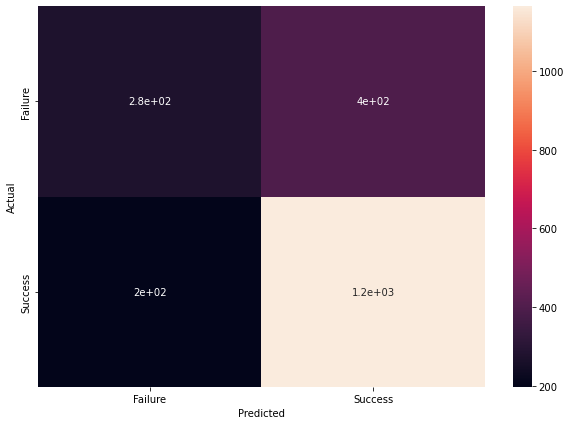

In [77]:
#Plotting a confustion matrix using matplotlib


%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm_df,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')